In [5]:
%pylab nbagg
%matplotlib notebook
#from scipy.optimize import *
import cma, como
import numpy as np

import pylab as pl
import matplotlib.pyplot as plt
import copy

import math

Populating the interactive namespace from numpy and matplotlib


/Users/tourealite/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
dimension = 10  # dimension of the search space
num_kernels = 11 # number of single-objective solvers (number of points on the front)
sigma0 = 0.2    # initial step-sizes

In [13]:
list_of_solvers = como.get_cmas(num_kernels * [dimension * [0]], sigma0, {'tolx': 10**-4}) # produce `num_kernels cma instances`
moes = como.Sofomore(list_of_solvers, reference_point = [1.1,1.1]) # create a como-cma-es instance

In [14]:
fitness = como.FitFun(lambda x: 1 / len(x) * cma.ff.sphere(x), lambda x: 1 / len(x) * cma.ff.sphere(x-1)) # a callable bi-objective function

<IPython.core.display.Javascript object>


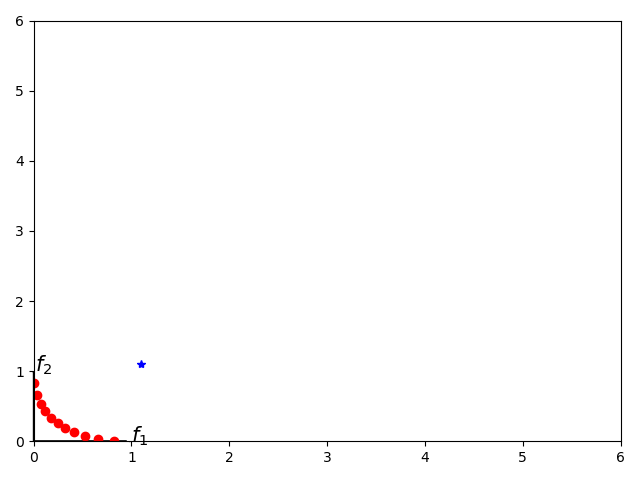

Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1     10 1.100000000000001e-01 1.0e+00 2.00e-01  2e-01  2e-01
    2     20 2.869740072828259e-01 1.0e+00 2.00e-01  2e-01  2e-01
    3     30 2.872184552795706e-01 1.0e+00 2.00e-01  2e-01  2e-01
  100   1000 9.513533592949879e-01 1.5e+00 1.32e-01  1e-01  1e-01
  200   2000 9.893307063809713e-01 1.7e+00 1.05e-01  8e-02  1e-01
  300   3000 1.004857352161355e+00 1.8e+00 7.34e-02  5e-02  7e-02
  400   4000 1.009237397885878e+00 1.7e+00 4.86e-02  3e-02  4e-02
  500   5000 1.011012266648915e+00 1.9e+00 3.16e-02  2e-02  3e-02
  600   6000 1.011622311081822e+00 2.0e+00 1.96e-02  1e-02  1e-02
  700   7000 1.011920946749253e+00 2.0e+00 1.09e-02  6e-03  8e-03
  800   8000 1.012044409331412e+00 1.9e+00 7.81e-03  4e-03  5e-03
  900   9000 1.012100855416869e+00 2.0e+00 5.78e-03  3e-03  4e-03
 1000  10000 1.012135796163460e+00 1.9e+00 4.99e-03  2e-03  3e-03
 1100  110

KeyboardInterrupt: 

In [15]:
#Animation of COMO with 2 objectives 

fig = plt.figure(432579)
ax = fig.add_subplot(111)
#ax = fig.add_axes([0,0,1,1])

# manual arrowhead width and length
ymax = 1
ymin = 0
xmax = 1
xmin = 0
hw = 1./100.*(ymax-ymin) 
hl = 1./100.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.3 # arrow overhang
 
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height
 
    
# compute matching arrowhead length and width
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
 
text1 = plt.text(1,0,r'$f_{1}$')
text2 = plt.text(0,1,r'$f_{2}$')
text1.set_fontsize(15)
text2.set_fontsize(15)

#ax.set_xlim([0,50])
#ax.set_ylim([0,50])
pl.ion()
fig.show()
fig.canvas.draw()
pl.xlim = [0.0, 1.1]
pl.ylim = [0.0, 1.1]
plt.xlim = [0.0, 1.1]
plt.ylim = [0.0, 1.1]

while not moes.stop():
    #making a step on the COMO algorithm
    moes.optimize(fitness, iterations = 1)

    ax.clear()
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
#    f1 = np.array([fun[0](mycma.mean) for mycma in mymo.kernels])
#    f2 = np.array([fun[1](mycma.mean) for mycma in mymo.kernels])
    tab = [kernel.objective_values for kernel in moes.kernels]
    f0 = [vec[0] for vec in tab]
    f1 = [vec[1] for vec in tab]

#   plt.grid(which = "major")
 #   plt.grid(which = "minor")
 #           plt.plot(f1,f2,'o')    
    ax.arrow(0, 0, 0.99, 0., fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False) 

    ax.arrow(0, 0, 0., 0.99, fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False)
    
    text1 = plt.text(1,-0.01,r'$f_{1}$')
    text2 = plt.text(0.01,0.99,r'$f_{2}$')
    text1.set_fontsize(15)
    text2.set_fontsize(15)

    ax.plot(f0,f1,'ro')
    ax.plot([0, 1], [1, 0], 'wo')
    ax.plot([moes.reference_point[0]], [moes.reference_point[0]], 'b*', label = "reference point")
    
    pl.tight_layout()
    fig.canvas.draw()
    plt.legend(loc = 1)
   # pl.savefig('./convfig/convergence{}.png'.format(iteration))